# Converting Size Distributions

Particle size distributions play a critical role in aerosol science, impacting areas such as air quality monitoring, environmental health, and various industrial processes. These distributions provide insights into the number, volume, or mass concentration of aerosol particles across different size ranges, aiding in the analysis of aerosol behavior and effects. For specific analyses or models, converting between size distribution scales, like from number to volume concentration, is often necessary. This document introduces a Python-based size distribution converter designed to facilitate conversions across different aerosol size distribution scales without the need to manually handle conversion formulas or functions, employing a factory pattern to determine the appropriate conversion strategy based on the scales involved.

### Aerosol Size Distribution Scales:

Aerosol size distributions are characterized through various metrics and scales, with each serving specific purposes in analysis and practical application. These descriptions offer a more nuanced understanding of each type:

1. **Number Concentration (dN/dlogDp)**: This metric quantifies the number of aerosol particles within a specified size range per unit volume of air. It is essential for assessing particle prevalence in environmental and health-related studies, providing a direct measure of how many particles are present in a given volume.

2. NOT IMPLEMENTED **Mass Concentration (dM/dlogDp)**: Indicates the total mass of particles within a specific size range per unit volume of air. This measure is crucial for understanding the mass-related impacts of aerosols on health, visibility, and climate, as it relates directly to the amount of material in the atmosphere.

3. NOT IMPLEMENTED **Volume Concentration (dV/dlogDp)**: This scale measures the collective volume of particles within a specified size range per unit volume of air. It's particularly useful for understanding the packing density and potential space occupancy of aerosols in a given volume, affecting light scattering and particle deposition processes.

4. NOT IMPLEMENTED **Surface Area Concentration (dA/dlogDp)**: Provides the total surface area of particles within each size bin per unit volume of air. Though not implemented yet, this metric is vital for evaluating the interaction potential of aerosols with gases and other particles, as well as their reactivity and potential health impacts related to surface chemistry.

5. **Probability Density Function (PDF)**: [Wikipedia link](https://en.wikipedia.org/wiki/Probability_density_function) A statistical representation that describes the likelihood of particles existing within specific size intervals. The PDF is instrumental in stochastic modeling, offering insights into the overall shape and characteristics of the size distribution, which helps in predicting aerosol behavior under various conditions.

6. **Probability Mass Spectrum (PMS)**: [Wikipedia link](https://en.wikipedia.org/wiki/Probability_mass_function) Acts as a discrete counterpart to the PDF, providing a quantized view of the size distribution that is especially useful for numerical and computational modeling. The PMS is essentially a snapshot of the number concentration (dN) distributed across discrete size bins, enabling detailed analysis and simulation of aerosol dynamics.

These metrics facilitate a comprehensive analysis of aerosol properties and behaviors, enabling researchers and practitioners to tailor their approaches based on the specific requirements of their work, whether it be in environmental monitoring, health impact assessment, or atmospheric science.

### The Converter Class and Factory Pattern:

The converter class is structured to allow for the conversion between different aerosol size distribution formats efficiently. 

The core `Converter` class is designed not to implement conversion behaviors directly. Instead, it utilizes a `ConversionStrategy` object that follows a specified interface to carry out conversions. This strategy-based design permits the flexible exchange of conversion methodologies without requiring changes to the `Converter` class, promoting maintainability.

A key component of this system is the `get_conversion_strategy` factory function, which streamlines the acquisition of an appropriate conversion strategy based on the provided input and output scales. This function assesses the scales and furnishes an instance of the suitable strategy class, thus simplifying the conversion operation.

### Examples:

Subsequent sections will showcase the practical application of the size distribution converter through examples. These examples will cover conversions such as transforming number concentration to the probability mass spectrum and the reverse process, illustrating the converter's utility and flexibility.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# particula imports
from particula.util import convert, distribution_discretization
from particula.util.size_distribution_convert import SizerConverter, get_conversion_strategy

## Generate PDF

To understand the behavior these different representations, we start by making a PDF. Probability Density Function (PDF), offers a continuous function representing the relative likelihood of particle sizes within a specific range. 

Lognormal distributions are characterized by their ability to model particle sizes that cannot be negative and are skewed towards larger sizes. This distribution is defined by a geometric mean diameter and a geometric standard deviation, indicating the spread of particle sizes.

Expanding on the markdown for generating a Probability Density Function (PDF) for a lognormal distribution, including details for the code example provided:

### Variables

- **Diameters**: A range of particle diameters is defined from 20 nm to 1000 nm, discretized into 500 points, to cover the typical size range of interest in aerosol studies.

- **Sigma & Modes**: The lognormal distribution's geometric standard deviation (sigma) and modes (peak diameters) are specified, reflecting the distribution's breadth and the sizes most represented in the sample.

- **Number Total**: The total number of particles within the distribution is set, allowing for the scaling of the PDF to represent actual particle concentrations.

- **Distribution Discretization**: The `distribution_discretization.discretize` function computes the PDF based on the specified parameters. This PDF is then scaled by the total number of particles to reflect the actual size distribution.

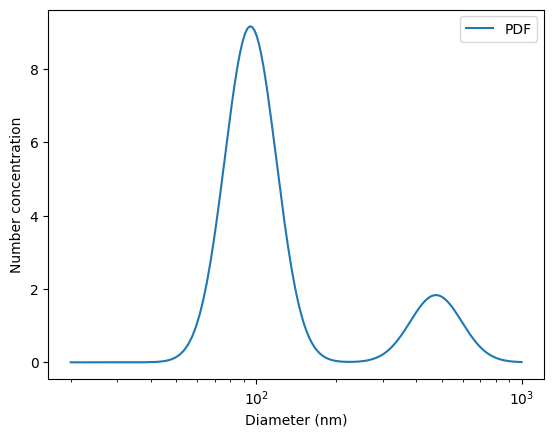

In [3]:
# Define the range and resolution of particle diameters (in nanometers)
diameters = np.linspace(20, 1000, 500)  # From 20 nm to 1000 nm with 500 points

# Standard deviation of the log-normal distribution (dimensionless)
sigma = 1.25

# Define the modes (peak diameters) for a bimodal distribution
modes = [100, 500]

# Total number of particles in the distribution
number_total = 1e3

# Generate a log-normal probability density function (pdf) with an area
# equal to 1, then scale by total number of particles
pdf_dist = distribution_discretization.discretize(
    interval=diameters,  # Array of diameters over which to compute the distribution
    disttype="lognormal",  # Type of distribution
    gsigma=sigma,  # Geometric standard deviation
    mode=modes,  # Modes of the distribution
    nparticles=number_total  # Total number of particles
).m * number_total

# Visualization
fig, ax = plt.subplots()
ax.plot(diameters, pdf_dist, label="PDF")
ax.set_xscale("log")  # Logarithmic scale for diameters
ax.set_xlabel("Diameter (nm)")  # X-axis label
ax.set_ylabel("Number concentration")  # Y-axis label
ax.legend()  # Show legend
plt.show()  # Display the plot

## PDF to PMS Conversion

 The PDF provides a continuous function indicating the likelihood of particle sizes within a specific range, while the PMS offers a discrete representation, particularly useful for computational modeling and real measurements.

### Conversion from PMS to PDF

In practice, converting between these distributions allows researchers to leverage the strengths of both representations for comprehensive analysis. The provided code snippet illustrates how to convert a PMS distribution to a PDF using a predefined conversion strategy within a Python implementation. This process involves obtaining the appropriate conversion strategy from `pms` to `pdf`, creating a converter with this strategy, and then applying the conversion to a given distribution.

### Code Description

- **Conversion Strategy**: A strategy for converting from PMS to PDF is obtained using `get_conversion_strategy`, indicating that the conversion will take the form of a probability mass spectrum to a probability density function.
  - Input_scale can either be 'dn/dlogDp' or 'pms'.
  - Output_scale can either be 'pms' or 'pdf'.
  - Use the inverse flag to invert the direction of the conversion.
- **Converter Creation**: A `SizerConverter` object is instantiated with the conversion strategy, setting the stage for the conversion process.
- **Distribution Conversion**: The actual conversion is performed by calling the `convert` method on the `pms_to_pdf_converter`, specifying the diameters and concentration from the original PDF distribution and setting `inverse=True` to indicate the direction of conversion.

### Comparison Insights

- **Scale Adaptability**: The logarithmic scale for diameters effectively demonstrates the wide range of particle sizes and emphasizes the adaptability of both distributions across this range.
- **Distribution Form**: The PDF, being continuous, smoothly varies across sizes, while the PMS, as a discrete spectrum, provides specific values at each size interval, useful for detailed numerical analysis.
- **Application Suitability**: The visualization and comparison underline the suitability of each distribution form for different applications: the PDF for theoretical studies and understanding general trends, and the PMS for detailed numerical simulations and modeling.

Through this conversion and comparison, researchers can better interpret aerosol size distributions, applying the most appropriate representation to their specific research needs and analytical frameworks.

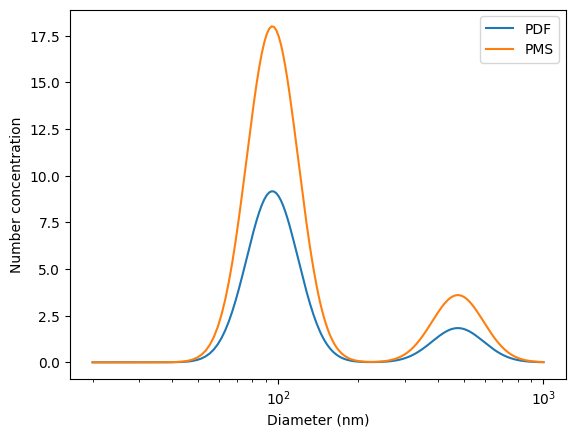

In [4]:
# Get the conversion strategy
pms_to_pdf = get_conversion_strategy(
    input_scale='pms',
    output_scale='pdf')

# Create the converter
pms_to_pdf_converter = SizerConverter(pms_to_pdf)

# Convert distribution
pms_dist = pms_to_pdf_converter.convert(
    diameters=diameters,
    concentration=pdf_dist,
    inverse=True,
)

# Visualization
fig, ax = plt.subplots()
ax.plot(diameters, pdf_dist, label="PDF")
ax.plot(diameters, pms_dist, label="PMS")
ax.set_xscale("log")  # Logarithmic scale for diameters
ax.set_xlabel("Diameter (nm)")  # X-axis label
ax.set_ylabel("Number concentration")  # Y-axis label
ax.legend()  # Show legend
plt.show()  # Display the plot

# PDF to dN/dlogDp Conversion

In this code block, we address the conversion of aerosol size distribution data from the $dN/dlogD_p$ format to a probability density function (PDF). The $dN/dlogD_p$ format represents the number concentration of particles distributed per unit log diameter, a common representation in aerosol science for describing size distributions, particularly useful for emphasizing the distribution of particles across logarithmically spaced diameter bins.

### Code Description

**Obtaining the Conversion Strategy**: The first step involves acquiring the appropriate conversion strategy to transition from $dN/dlogD_p$ to PDF. This is achieved through the `get_conversion_strategy` function, specifying `input_scale='dn/dlogdp'` and `output_scale='pdf'`, which determines the correct algorithm or mathematical approach for the conversion.

**Creating the Converter**: A `SizerConverter` object is then instantiated with the obtained conversion strategy. This converter encapsulates the conversion logic, providing a clean interface for applying the conversion to aerosol size distribution data.

**Performing the Conversion**: The actual conversion is executed by invoking the `convert` method of the converter, passing in the diameters and concentration values from the previously obtained or generated distribution. The `inverse=True` parameter indicates that the conversion direction is from the output scale back to the input scale, effectively generating a $dN/dlogD_p$ distribution from a PDF.


### Visualization:

The code block concludes with the visualization of the original PDF, the previously converted PMS distribution, and the newly converted $dN/dlogD_p$ distribution. Plotting these distributions together, especially on logarithmic scales for both diameters and concentrations, facilitates a comprehensive comparison of how particle sizes and their concentrations are represented across these different formats.

This conversion and visualization process underscores the versatility and analytical depth achieved through transitioning between different aerosol size distribution formats. By comparing the continuous PDF, discrete PMS, and $dN/dlogD_p$ formats, researchers can gain nuanced insights into particle size distributions, enhancing the understanding of aerosol dynamics, source contributions, and environmental impacts.

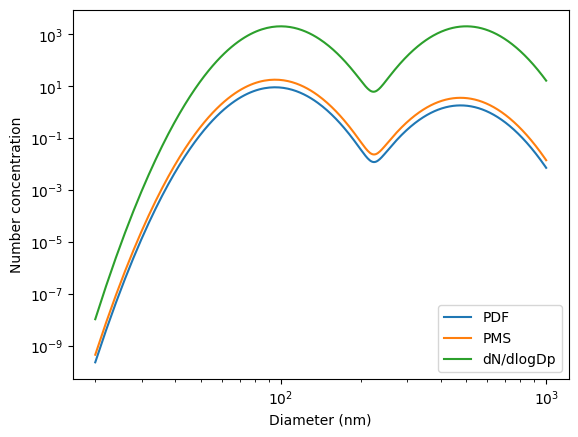

In [5]:
# Get the conversion strategy
dNdlogDp_to_pdf = get_conversion_strategy(
    input_scale='dn/dlogdp',
    output_scale='pdf')

# Create the converter
dNdlogDp_to_pdf_converter = SizerConverter(dNdlogDp_to_pdf)

# Convert distribution
dNdlogDp_dist = dNdlogDp_to_pdf_converter.convert(
    diameters=diameters,
    concentration=pdf_dist,
    inverse=True,
)

# Visualization
fig, ax = plt.subplots()
ax.plot(diameters, pdf_dist, label="PDF")
ax.plot(diameters, pms_dist, label="PMS")
ax.plot(diameters, dNdlogDp_dist, label="dN/dlogDp")
ax.set_xscale("log")  # Logarithmic scale for diameters
ax.set_yscale("log")  # Logarithmic scale for concentrations
ax.set_xlabel("Diameter (nm)")  # X-axis label
ax.set_ylabel("Number concentration")  # Y-axis label
ax.legend()  # Show legend
plt.show()  # Display the plot

# Conclusions

This discussion centers around the implementation of a flexible and modular system for converting between various aerosol size distribution formats using Python. The system leverages a factory pattern to dynamically select conversion strategies based on input and output scale requirements. Through examples, we have demonstrated conversions between Probability Density Function (PDF), Probability Mass Spectrum (PMS), and the number concentration (dN/dlogDp) formats.

### Summary of Implementation

The process begins with the generation of a PDF for a lognormal distribution, representing the likelihood of finding particles within specific size ranges. This foundational step is crucial for understanding aerosol particle distributions and their environmental or health impacts. 

Subsequently, we showcased how to convert this PDF into a PMS distribution and then from PMS to PDF, utilizing a `SizerConverter` class. This class applies a strategy pattern, enabling the flexible application of different conversion strategies without altering the core logic of the converter itself.

The final code block illustrates converting from the number concentration format (dN/dlogDp) back to a PDF, underscoring the system's versatility in handling diverse aerosol size distribution data. This versatility is critical for aerosol scientists who work across various measurement techniques and modeling approaches.

### Expand the Factory

The factory pattern has proven effective in providing a scalable and maintainable framework for extending the conversion capabilities of the system. To incorporate additional conversions not yet implemented, such as volume or mass concentration (dV/dlogDp or dM/dlogDp) and surface area concentration (dA/dlogDp), the following steps can be followed:

1. **Define New Strategy Classes**: For each new conversion requirement, a corresponding strategy class implementing the `ConversionStrategy` interface should be defined. These classes would encapsulate the specific logic for converting between the new formats and the existing ones.

2. **Extend the Factory Function**: The `get_conversion_strategy` function should be expanded to recognize and return instances of the new strategy classes based on the provided input and output scales. This extension involves updating the function's logic to handle the new scale identifiers and ensuring that all valid conversion paths are accounted for.

3. **Validation and Testing**: With each new conversion strategy added, comprehensive validation and testing are crucial to ensure accuracy and reliability. This may involve comparing the results with known benchmarks or empirical data.

By following this approach, the system can be readily expanded to cover a broader range of aerosol size distribution formats as needed, while maintaining the core advantages of flexibility and modularity provided by the factory pattern. This design not only facilitates the easy integration of new conversion capabilities but also ensures that the system remains adaptable to the evolving needs of aerosol science research and application.

In [6]:
help(get_conversion_strategy)

Help on function get_conversion_strategy in module particula.util.size_distribution_convert:

get_conversion_strategy(input_scale: str, output_scale: str) -> particula.util.size_distribution_convert.ConversionStrategy
    Factory function to create and return an appropriate conversion
    strategy based on input and output scales. Use the inverse flag in the
    converter to invert the directions of the input and output scales.
    
    Args:
        input_scale: The scale of the input concentration values.
            Either 'dn/dlogdp' or 'pms'.
        output_scale: The desired scale of the output concentration
            values. Either 'pms' or 'pdf'. Use inverse flag to invert the input
            and output scales.
    
    Returns:
        ConversionStrategy: A strategy object capable of converting between
            the specified scales.
    
    Raises:
        ValueError: If the input_scale or output_scale is not supported, or
            if the specified conversion is uns

In [7]:
help(SizerConverter)

Help on class SizerConverter in module particula.util.size_distribution_convert:

class SizerConverter(builtins.object)
 |  SizerConverter(strategy: particula.util.size_distribution_convert.ConversionStrategy)
 |  
 |  A converter that uses a specified ConversionStrategy to convert
 |  particle size distribution data between different formats.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, strategy: particula.util.size_distribution_convert.ConversionStrategy)
 |      Initializes the converter with a conversion strategy.
 |      
 |      Args:
 |          strategy (ConversionStrategy): The strategy to use for conversion.
 |  
 |  convert(self, diameters: numpy.ndarray, concentration: numpy.ndarray, inverse: bool = False) -> numpy.ndarray
 |      Converts particle size distribution data using the specified
 |      strategy.
 |      
 |      Args:
 |          diameters (np.ndarray): The particle diameters.
 |          concentration (np.ndarray): The concentration values.
 |       